**Dataset**: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data#Test.csv


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [0]:
%matplotlib inline
rcParams['figure.figsize'] = 7,5
plt.style.use('seaborn-whitegrid')

In [10]:
#load the data
from google.colab import files    
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [0]:
sales_train = pd.read_csv('Train.csv')
sales_test = pd.read_csv('Test.csv')

In [12]:
sales_data = pd.concat([sales_train, sales_test], ignore_index=True)
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [14]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

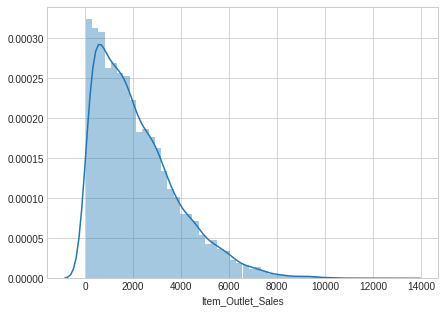

In [15]:
sb.distplot(sales_train['Item_Outlet_Sales'])

<BarContainer object of 8523 artists>

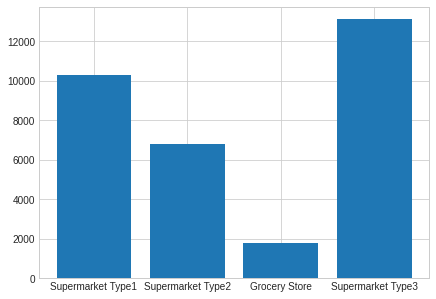

In [16]:
plt.bar(sales_train['Outlet_Type'], sales_train['Item_Outlet_Sales'])

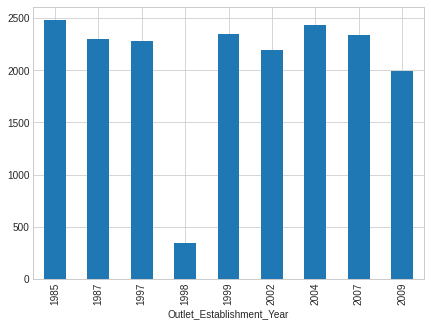

In [17]:
sales_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [18]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

**Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

The lower ‘**count**’ of **Item_Weight** and **Item_Outlet_Sales** confirms the findings from the missing value check.

In [19]:
sales_data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

 1559 products and 10 outlets/stores,  Item_Type has 16 unique values

In [20]:
#Filter categorical variables
categorical_columns = [x for x in sales_data.dtypes.index if sales_data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print (sales_data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

**Item_Fat_Content:** (**格式不统一**) ‘Regular’ are mentioned as ‘regular’.

**Item_Type:**不是全部分类都有标数

**Outlet_Type:** 3种类型超市吗？

-------**DATA_CLEANING**

In [21]:
#Impute the null values with item_weight
#Check result after filled
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna((sales_data['Item_Weight'].mean()))
sales_data.isnull().sum()


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [22]:
sales_data['Item_Outlet_Sales'] = sales_data['Item_Outlet_Sales'].fillna((sales_data['Item_Outlet_Sales'].mean()))
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
#impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.
sales_data['Outlet_Size']= sales_data['Outlet_Size'].fillna((sales_data['Outlet_Size'].mode()[0]))
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
sales_data[sales_data['Item_Visibility']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


In [25]:
#calculate total 0 in item_visibility
Zero_Item_Visibility = (sales_data['Item_Visibility']==0)
print(Zero_Item_Visibility.sum())


879


In [26]:
#Impute with mean
sales_data.loc[Zero_Item_Visibility, 'Item_Visibility'] = sales_data['Item_Visibility'].mean()
Zero_Item_Visibility = (sales_data['Item_Visibility']==0)
print(Zero_Item_Visibility.sum())

0


In [27]:
#item_identifier label change/classify
sales_data['new_Item_Identifier'] = sales_data['Item_Identifier'].apply(lambda x: x[0:2])
sales_data['new_Item_Identifier'] = sales_data['new_Item_Identifier'].replace({'FD':'food', 'NC': 'non-consumable', 'DR':'drinks'})
sales_data['new_Item_Identifier'].value_counts()

food              10201
non-consumable     2686
drinks             1317
Name: new_Item_Identifier, dtype: int64

In [28]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [29]:
#change the label to regular measurements
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
sales_data['Item_Fat_Content'].value_counts()


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [0]:
# sales_data['Outlet_Year'] = 2013 - sales_data['Outlet_Establishment_Year']

sales_data.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis = 1, inplace =True)

In [0]:
sales_data = pd.get_dummies(sales_data, columns = [ "new_Item_Identifier","Item_Fat_Content", "Item_Type",
                                                   "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", 
                                                   "Outlet_Type" ], drop_first = True)


In [32]:
sales_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,new_Item_Identifier_food,new_Item_Identifier_non-consumable,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,19.20,0.065953,182.0950,732.3800,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.93,0.065953,53.8614,994.7052,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [0]:
#label train/test dataset
y = sales_data['Item_Outlet_Sales']
sales_data.drop(['Item_Outlet_Sales'], axis =1, inplace= True)
x = sales_data

X_train = x[:len(sales_train)]
X_test = x[len(sales_train):]

y_train = y[:len(sales_train)]

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train, y_train, test_size =0.2, random_state = 0)


In [0]:
slc = StandardScaler()
Xtrain = slc.fit_transform(Xtrain)
Xtest = slc.fit_transform(Xtest)

X_test = slc.transform(X_test)

In [0]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
num_folds = 10
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=num_folds, random_state=None)

In [39]:
model = XGBRegressor(n_estimators=70 , learning_rate = .1)
score_= cross_val_score(model,Xtrain, Ytrain, cv=kfold, scoring=scoring)
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
print(r2_score(Ytest, predictions))
rmse = np.sqrt(mean_squared_error(Ytest, predictions))

[16:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [40]:
rmse = np.sqrt(mean_squared_error(Ytest, predictions))
rmse

1108.922540609035